# Chapter 5, Question 13

In chapter 5, question 13 asks about correlating the $pK_a$ values of a series of related compounds between water and acetonitrile. The exercise in answering question 13 is exactly what you will be doing when you use similar data in your assignment. Let us make a plot and see if it correlates.

<img src="images/Ch5Problem13.png" width=200 class=center />


## Step 1: Enter the Data

Here I will directly enter the data in this notebook.  I will first create an array of arrays (a matrix) and then convert that to a *Pandas* dataframe.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt      # load the optimize sublibrary from scipy
import scipy.stats as stats       # load the stats sublibrary from scipy


############################
### Set global variables ###
############################

github_data_location = "https://github.com/blinkletter/LFER-QSAR/blob/main/data/"
github_styles_location = "https://github.com/blinkletter/LFER-QSAR/blob/main/styles/"
github_download = "?raw=True"



In [2]:
### We have seen data read in from files. Here we are entering it 
### directly in the code as an array of arrays (a matrix)
### and then we convert the matrix to a dataframe

data =[
       ["H",    20.6, 12.2],
       ["NO2",  17.8,  9.8],
       ["CN",   18.4, 10.9],
       ["CF3",  19.0, 11.4],
       ["Cl",   19.7, 11.7],
       ["Br",   19.6, 11.6],
       ["CH3",  20.9, 12.4],
       ["OCH3", 21.0, 12.6]
      ]
display(data)   # display the matrix

### The code below converts the matrix to a dataframe and assigns
### column names to the dataframe.

df = pd.DataFrame(data, columns = ['Substituent','Acetonitrile','Water'])
df.set_index("Substituent", inplace = True)

display(df)    # display the dataframe with its column labels


[['H', 20.6, 12.2],
 ['NO2', 17.8, 9.8],
 ['CN', 18.4, 10.9],
 ['CF3', 19.0, 11.4],
 ['Cl', 19.7, 11.7],
 ['Br', 19.6, 11.6],
 ['CH3', 20.9, 12.4],
 ['OCH3', 21.0, 12.6]]

,Acetonitrile,Water
Substituent,,
H,20.6,12.2
NO2,17.8,9.8
CN,18.4,10.9
CF3,19.0,11.4
Cl,19.7,11.7
Br,19.6,11.6
CH3,20.9,12.4
OCH3,21.0,12.6


## Step 2: Visualize the Data
I will run a quick plot to visualize the data. There is a trend but is one point a little off the line?

**Note**: The code below demonstrates a simple plot.  I schose a set of x and y values and then plotted them.  that is all.

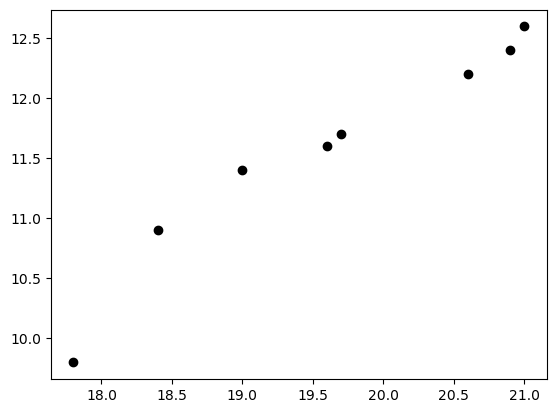

In [3]:
x = df["Acetonitrile"]
y = df["Water"]


plt.plot(x,y, "ko")  # k = black, o = circle
plt.show()

## Step 3: Making the Plot Informative

Lets do some formatting, add axis titles and display a line fit.

I openned up the book for Python in Chemistry on the moodle site and plagiarized it mercilessly. Cut and paste is your friend, but only in computer science.

**Note**: the code below demonstrates a plot with styles and other features of tge MatPlotLib package. I set axis titles, a title for the plot, styled the plot with a grid and lots more. You can examine it and steal what you find useful.

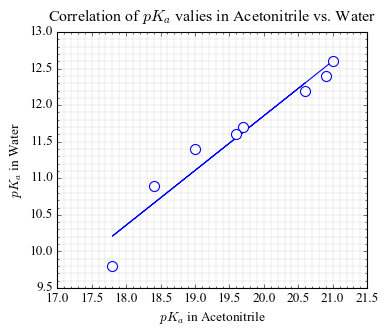

In [4]:
x = df[:]["Acetonitrile"]
y = df[:]["Water"]

### select a style file for the plot

style = "S2_classic2.mplstyle"
style_file_path = github_styles_location + style + github_download

### Apply the style file. This is one way to be the same kind of fancy every time.

plt.style.use(style_file_path)        

### Create a blank figure (the space for plots) and an empty plot (fig = the figure space, ax = the plot (in python, plots are called axes))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

### Set the titles and ranges for the x and y axis in the plot. We are modifying properties of the "ax" object here

ax.set(title=r"Correlation of $pK_a$ valies in Acetonitrile vs. Water",       
       xlabel=r"$pK_a$ in Acetonitrile", 
       ylabel="$pK_a$ in Water",                
       xlim=[17,21.5],                  
       ylim=[9.5,13]
      )                   

fit = stats.linregress(x, y)             # use linear regression to fit the data

### Extract stat parameters from the "fit" object
slope = fit.slope
slope_stderr = fit.stderr
intercept = fit.intercept
int_stderr = fit.intercept_stderr
r = fit.rvalue
rsq = r**2

y_calc = slope * x + intercept           # calculate y-values based on the curve fit parameters
plt.plot(x, y_calc, "-")                 # plot the line for the curve fit parameters

ax.plot(x,y,"o")                         # now plot the data points. This way the points are on top of the line.

#fig.savefig("plot.pdf")     # Uncomment to create a PDF file of the plot
plt.show()



## Step 4: Make a Point

The left-most data point does indeed appear to be off the line. I will curve fit the data without this point and plot the line. Then I will plot all the data over that, including the point that was not included in the line fit. This will highlight my hypothesis that there is a correlation and only one point is not fitting well. We can then investigate that one point further.

**Note**: The code below uses the same styled plot as above and I added a little bit of code that add a string of text next to each data point.  the text chosen was the lav]bel in the 'Substituent' column (which is the index column for both the x and y data series)

,Acetonitrile,Water
Substituent,,
H,20.6,12.2
CN,18.4,10.9
CF3,19.0,11.4
Cl,19.7,11.7
Br,19.6,11.6
CH3,20.9,12.4
OCH3,21.0,12.6


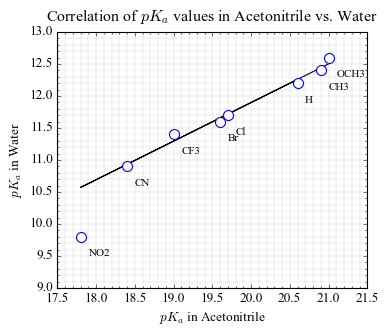

In [8]:
### x,y data from dataframe
y = df["Water"]
x = df["Acetonitrile"]

### an edited set of x,y data without the outlier point.

df_edited = df.drop(labels=["NO2"], axis = 0)   # I inspected the dataframe and saw that the "NO2" row was the outlier
display(df_edited)

y_edited = df_edited["Water"]
x_edited = df_edited["Acetonitrile"]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

### Linear fit of edited data
fit = stats.linregress(x_edited, y_edited)   # use linear regression to fit the data

### Extract stat parameters from the "fit" object
slope = fit.slope
slope_stderr = fit.stderr
intercept = fit.intercept
int_stderr = fit.intercept_stderr
r = fit.rvalue
rsq = r**2

### Plot a line using the linear fit parameters for edited data
y_calc = slope * x + intercept           # calculate y-values based on the curve fit parameters
plt.plot(x, y_calc, "k-")                # plot the line for the curve fit parameters

### Plot the original data
ax.plot(x,y,"o")

### For each data point, add the text label in the substituent column
for a in range(len(x)):
    plt.text(x[a]+.1, y[a]-.3, df.index[a], fontsize=10)

### Add titles and size the plot
    ax.set(title=r"Correlation of $pK_a$ values in Acetonitrile vs. Water",       
       xlabel=r"$pK_a$ in Acetonitrile", 
       ylabel="$pK_a$ in Water",                
       ylim=[9,13],                  
       xlim=[17.5,21.5]
      )                   

### display the plot figure    
#plt.savefig("plot.pdf")
plt.show()




## Step 5. Explaining Observations

In general we see that substituents that we know are electron-withrawing result in more acidic molecules in this case. Electron-withdrawing groups will destabilize the positive charge formed when the molecule is protonated. The effect is greater in acetonitrile where the positive charge is already less stabilized than in the case of water. The $\Delta pK_a$ from cyano to methoxy is 2.5 in acetonitrile and only 1.7 in water. (this may not sound like much but is representas almost a 10-fold difference in $K_a$ values)

The nitro group is a powerful electron acceptor and the para position allows it to accept electrons by resonance. Because it can establish a resonance connection all the way through to the nitrogens of the guanidinium group, it is much more effective at withdrawing electrons than groups that cannot use resonance. For example, CF$_3$, Br and Cl are electron-withdrawing but do not have the extra power of resonance. 

<img src="images/Question13Scheme.png" width=400 class=center />

This resonance effect is stronger in water because the more polar nature of water allows for more of the resonance contributor with split charges to exist. In acetonitrile the resonance effect is not as large because the electron sharing creates more charges and so is disfavoured in less polar solvents.